In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Converting Audio Data to numerical data and retriving labels from metadata**

Run for only once(First Time)

In [ ]:
import zipfile
import os
import librosa
import pandas as pd
import shutil
import sys

# Mood Miners Emotion Detection Project
# Description: This file contains the code to load the data from the zip file

zip_path = '/content/drive/MyDrive/Data_Mining_CMPE_255/ravdess_data.zip'

def process_audio_from_zip(zip_path):
    """
    This function takes in the path to a zip file containing audio files.
    It then processes the audio data using librosa and creates and returns a dataframe.
    """
    # set extract path to name of zip
    print(zip_path)
    extract_path = zip_path.split('.')[0]
    # create the directory if it doesn't exist
    if not os.path.exists(extract_path):
        print(extract_path)
        print('Extracting zip file ' + zip_path.split('/')[1] + ' to ' + zip_path.split('.')[0])

        os.makedirs(extract_path)

        # extract the contents of the zip file to the directory
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
    # first, simple audio features used by librosa, excluding the raw data
    # features: tempo, spectral_centroid, spectral_bandwidth, spectral_rolloff, zero_crossing_rate
    #           chroma_stft, mfcc, rmse

    # second, inherent emotion features
    # creating the feature dictionary to return later as a df
    feature_dict = {'actor': [], 'tempo': [], 'y':[], 'sr':[], 'onset_env':[], 'spectral_centroid': [], 'spectral_bandwidth':[], 'spectral_rolloff':[], 'zero_crossing_rate':[], 'chroma_stft':[],
                    'mfcc':[], 'rmse':[], 'modality':[], 'vocal_channel':[], 'emotion':[], 'emotional_intensity':[], 'statement':[],'repetition':[]
    }
    # for each file in the directory ill be inserting the data into the feature dictionary
    for actor_dir in os.listdir(extract_path):
        if not actor_dir.startswith('Actor'):
            continue
        print('Processing the actor directory: ' + actor_dir)
        for wav_file in os.listdir(extract_path + '/' + actor_dir):
            if not wav_file.endswith('.wav'):
                continue
            ### Process Librosa Features ###
            # load the audio file
            y, sr = librosa.load(extract_path + '/' + actor_dir + '/' + wav_file, sr=None)
            # calculate the tempo
            tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
            # calculate the spectral centroid
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            # calculate the spectral bandwidth
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            # calculate the spectral rolloff
            spec_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            # calculate the zero crossing rate
            zcr = librosa.feature.zero_crossing_rate(y)
            # calculate the chroma stft
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            # calculate the mfcc
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            # calculate the rmse
            rmse = librosa.feature.rms(y=y)
            # calculate onset strength
            onset_env = librosa.onset.onset_strength(y=y, sr=sr)
            # add all the features to the dictionary
            # appending the features to the dictionary list with the following keys [tempo, spec_cent, spec_bw, spec_rolloff, zcr, chroma_stft, mfcc, rmse]
            feature_dict['actor'].append(actor_dir)
            feature_dict['tempo'].append(tempo)
            feature_dict['spectral_centroid'].append(spec_cent)
            feature_dict['spectral_bandwidth'].append(spec_bw)
            feature_dict['spectral_rolloff'].append(spec_rolloff)
            feature_dict['zero_crossing_rate'].append(zcr)
            feature_dict['chroma_stft'].append(chroma_stft)
            feature_dict['mfcc'].append(mfcc)
            feature_dict['rmse'].append(rmse)
            feature_dict['onset_env'].append(onset_env)
            feature_dict['y'].append(y)
            feature_dict['sr'].append(sr)

            ### Process Inherent Emotion Features ###
            identifiers_only = wav_file.split('.')[0].split('-')
            # Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
            feature_dict['modality'].append(identifiers_only[0])
            # Vocal channel (01 = speech, 02 = song).
            feature_dict['vocal_channel'].append(identifiers_only[1])
            # Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
            feature_dict['emotion'].append(identifiers_only[2])
            # Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
            feature_dict['emotional_intensity'].append(identifiers_only[3])
            # Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
            feature_dict['statement'].append(identifiers_only[4])
            # Repetition (01 = 1st repetition, 02 = 2nd repetition).
            feature_dict['repetition'].append(identifiers_only[5])

        print("Finished processing the actor directory: " + actor_dir)
    print("Finished processing all the audio files in the zip file " + zip_path.split('/')[1])

    # deleting the root directory after processing
    #print("Deleting the root directory " + extract_path)
    #shutil.rmtree(extract_path)

    actor_audio_df = pd.DataFrame(feature_dict)
    return actor_audio_df

# Check if the zip file exists
if os.path.exists(zip_path):
    print('Processing the zip file: ' + os.path.basename(zip_path))
    actor_audio_df = process_audio_from_zip(zip_path)
    # Save the dataframe to a CSV file in your Google Drive
    actor_audio_df.to_csv('/content/drive/My Drive/Data_Mining_CMPE_255/actors_meta_df.csv', index=False)
    print('Saved the dataframe to actors_meta_df.csv in your Google Drive')
else:
    print('Zip file not found. Please check the path.')
print('Finished processing all the zip files in the directory')
actor_audio_df.to_csv('actors_meta_df.csv', index=False)
print('Saved the dataframe to actors_meta_df.csv')

Processing the zip file: ravdess_data.zip
/content/drive/MyDrive/Data_Mining_CMPE_255/ravdess_data.zip
Processing the actor directory: Actor_01
Finished processing the actor directory: Actor_01
Processing the actor directory: Actor_02
Finished processing the actor directory: Actor_02
Processing the actor directory: Actor_03
Finished processing the actor directory: Actor_03
Processing the actor directory: Actor_04
Finished processing the actor directory: Actor_04
Processing the actor directory: Actor_05
Finished processing the actor directory: Actor_05
Processing the actor directory: Actor_06
Finished processing the actor directory: Actor_06
Processing the actor directory: Actor_07
Finished processing the actor directory: Actor_07
Processing the actor directory: Actor_08
Finished processing the actor directory: Actor_08
Processing the actor directory: Actor_09
Finished processing the actor directory: Actor_09
Processing the actor directory: Actor_10
Finished processing the actor directo

In [ ]:
import pandas as pd

# Path to your CSV file
csv_file_path = '/content/drive/MyDrive/Data_Mining_CMPE_255/actors_meta_df.csv'

# Read the CSV file
df = pd.read_csv(csv_file_path)

df.head()

,actor,tempo,y,sr,onset_env,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,chroma_stft,mfcc,rmse,modality,vocal_channel,emotion,emotional_intensity,statement,repetition
0,Actor_01,80.749512,[ 5.3765323e-08 -2.1233109e-08 -6.0478840e-09 ...,22050,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[[5531.02581655 5480.22710031 5168.55894061 50...,[[3251.94200337 3213.2299866 3147.28563493 31...,[[ 9593.04199219 9528.44238281 9076.24511719...,[[0.11035156 0.22167969 0.33740234 0.46044922 ...,[[0.3932696 0.46085843 0.7762219 ... 1. ...,[[-857.35706 -857.35706 -857.35706 ... -857.35...,[[7.0248973e-07 1.0096762e-06 1.3740606e-06 1....,3,1,1,1,1,1
1,Actor_01,161.499023,[-2.6555713e-06 -1.2237585e-05 -9.1077754e-07 ...,22050,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[[4943.78844814 4993.14701961 5019.49951966 48...,[[3303.78084551 3274.4497113 3177.76946252 32...,[[9043.9453125 9022.41210938 8893.21289062 87...,[[0.21435547 0.35546875 0.51757812 0.48632812 ...,[[0.727733 0.6844373 0.8753823 ... 0.81595...,[[-864.93823 -864.93823 -864.93823 ... -864.93...,[[1.5071627e-06 1.9333706e-06 2.1324131e-06 4....,3,1,1,1,1,2
2,Actor_01,80.749512,[ 2.1218262e-05 1.6835998e-05 3.5377532e-05 ...,22050,[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.2...,[[4124.22928218 4186.23653412 3888.17059489 42...,[[3377.77702259 3428.91685101 3540.62923274 35...,[[8516.38183594 8613.28125 8559.44824219 88...,[[0.20068359 0.31152344 0.47900391 0.47314453 ...,[[0.94580525 1. 1. ... 0.76746...,[[-8.49841370e+02 -8.47600647e+02 -8.45024780e...,[[1.56080205e-05 1.95363900e-05 2.00819723e-05...,3,1,1,1,2,1
3,Actor_01,64.599609,[ 2.2783310e-05 3.1151623e-05 4.7930480e-06 ...,22050,[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.9...,[[3563.56852705 3751.05040943 3654.12387706 34...,[[2895.64109173 2931.95090952 2932.44273905 29...,[[7116.72363281 7461.25488281 7439.72167969 74...,[[0.36132812 0.52441406 0.68066406 0.67480469 ...,[[0.3292048 0.32930663 0.43293932 ... 0.82115...,[[-8.3864246e+02 -8.3707300e+02 -8.3462799e+02...,[[1.05454747e-05 1.41018218e-05 1.64446537e-05...,3,1,1,1,2,2
4,Actor_01,117.453835,[ 1.2775290e-05 5.2579344e-07 -5.9776920e-07 ...,22050,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[[4858.00856769 4406.10423614 4227.83498837 41...,[[3362.09011809 3477.10536712 3506.02519979 34...,[[8990.11230469 8839.37988281 8828.61328125 86...,[[0.34912109 0.53271484 0.72460938 0.70800781 ...,[[0.8731101 0.88231164 0.78982794 ... 0.97081...,[[-9.0457202e+02 -8.9703583e+02 -8.9400964e+02...,[[7.8230814e-06 9.3913750e-06 9.4656834e-06 9....,3,1,2,1,1,1


**Here's a brief overview of the features extracted and their relevance:**

**Tempo:** The speed at which a piece of music is played. It's crucial for music analysis and can be important for understanding rhythm in speech.

**y (Audio Signal):** The raw audio data. It's the foundation from which all other features are derived.

**sr (Sample Rate):** The number of samples of audio carried per second. It's fundamental to digital audio processing.

**Onset_env (Onset Envelope):** Represents the times at which notes, chords, or percussive sounds start. It's useful in rhythm and beat detection.

**Spectral Centroid:** Indicates where the "center of mass" for a sound is located on the frequency spectrum and is often associated with the brightness of the sound.

**Spectral Bandwidth:** Relates to the width of the spectral centroid's spread. It gives an idea about the range of frequencies present in the sound.

**Spectral Rolloff:** A measure of the shape of the signal. It represents the frequency below which a certain percentage of the total spectral energy is contained.

**Zero Crossing Rate:** The rate at which the signal changes from positive to negative or back. This feature is often used in speech/music discrimination and for classification of percussive sounds.

**Chroma STFT (Short-Time Fourier Transform):** A representation of the music’s harmonic content. It's useful in identifying chords and understanding tonal content.

**MFCC (Mel-Frequency Cepstral Coefficients):** Particularly important in speech and audio signal processing for timbre recognition, as they capture the timbral aspects.

**RMSE (Root Mean Square Energy):** A measure of the power of the audio signal. It's used to detect silence and compare loudness across clips.

In [ ]:
df.describe()

,tempo,sr,modality,vocal_channel,emotion,emotional_intensity,statement,repetition
count,1440.000000,1440.0,1440.0,1440.0,1440.000000,1440.000000,1440.000000,1440.000000
mean,125.635374,22050.0,3.0,1.0,4.733333,1.466667,1.500000,1.500000
std,41.601913,0.0,0.0,0.0,2.175356,0.499061,0.500174,0.500174
min,46.981534,22050.0,3.0,1.0,1.000000,1.000000,1.000000,1.000000
25%,92.285156,22050.0,3.0,1.0,3.000000,1.000000,1.000000,1.000000
50%,123.046875,22050.0,3.0,1.0,5.000000,1.000000,1.500000,1.500000
75%,151.999081,22050.0,3.0,1.0,7.000000,2.000000,2.000000,2.000000
max,258.398438,22050.0,3.0,1.0,8.000000,2.000000,2.000000,2.000000


NOTE: Since the correlation is zero, we can drop the columns

In [ ]:
df['emotion'].corr(df['repetition']), df['emotional_intensity'].corr(df['repetition']), df['emotional_intensity'].corr(df['statement']), df['emotion'].corr(df['statement'])

(0.0, 0.0, 0.0, 0.0)

**Facts and Observations:**

Modality (01 = full-AV, 02 = video-only, 03 = audio-only)
As we are only working with Audio Data, modality is 3 throughout.

Vocal channel (01 = speech, 02 = song).
There is no data with an actor singing, so only speech data.

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
This is one of the Target Variable, Emotion Detection.

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
This is one of the Target variable, to determine the intensity

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
To determine the statement by an actor is too specific to identify and isn't the goal.

Repetition (01 = 1st repetition, 02 = 2nd repetition).
Every Statement in particular Emotion and Emotional Intensity is recorded twice by an actor thus there is a repetition of the same audio that might be minimally different.

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

**Actions**

We'll be dropping the:

actor, modality, vocal_channel, statement, repetition

**Target Features:**

Emotion and Emotional Intensity


In [ ]:
columns_to_drop = ['actor', 'modality', 'vocal_channel', 'statement', 'repetition']

# Drop the columns
df = df.drop(columns_to_drop, axis=1)

df.head()

Saving the modified data

In [ ]:
output_csv_file = '/content/drive/My Drive/Data_Mining_CMPE_255/actors_labeled_df.csv'

# Save the DataFrame as a CSV file
df.to_csv(output_csv_file, index=False)

Loading the modified file

In [3]:
import pandas as pd

File = '/content/drive/My Drive/Data_Mining_CMPE_255/actors_labeled_df.csv'

# Save the DataFrame as a CSV file
data_visuals = pd.read_csv(File) # variable initiated for visulization purposes
df = pd.read_csv(File)

In [ ]:
import ast
df['y'] = df['y'].apply(ast.literal_eval)

SyntaxError: ignored

In [ ]:
data_visuals.shape

(1440, 13)

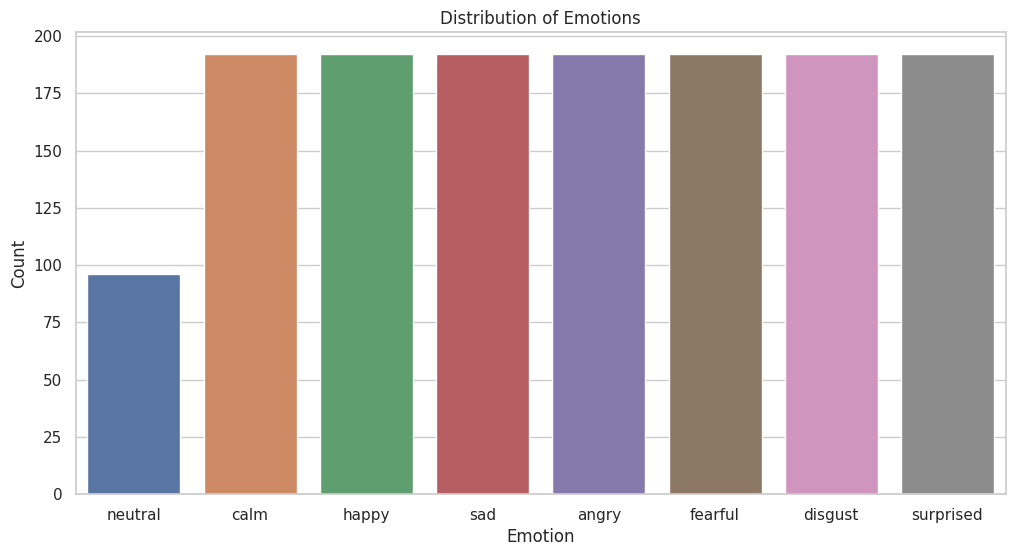

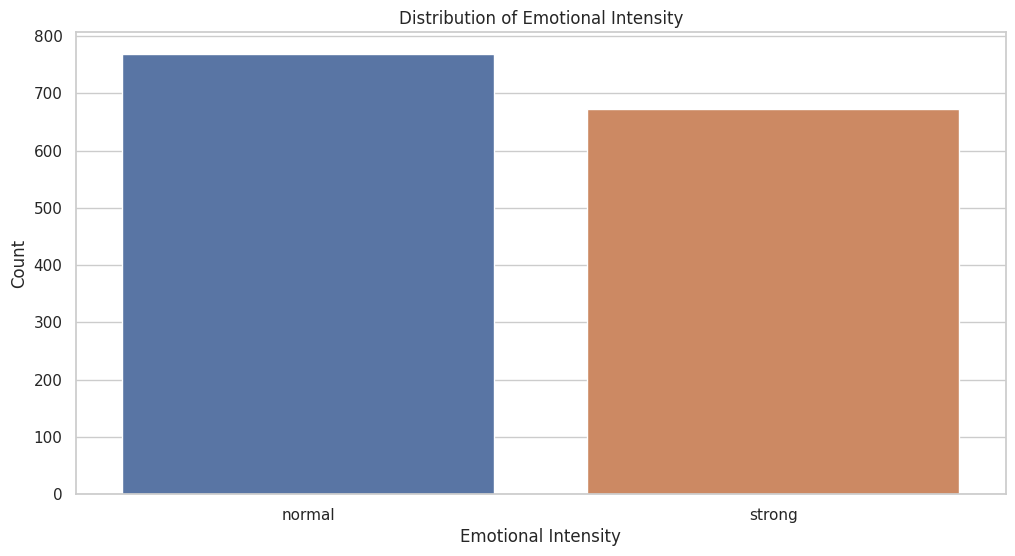

In [ ]:
from ctypes import DEFAULT_MODE
# For Better Visualizations mapping the data
# Mapping for 'emotion' and 'emotional_intensity'
emotion_mapping = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'
}
emotional_intensity_mapping = {1: 'normal', 2: 'strong'}

# Updating the dataset with these mappings
data_visuals['emotion'] = df['emotion'].map(emotion_mapping)
data_visuals['emotional_intensity'] = df['emotional_intensity'].map(emotional_intensity_mapping)

import matplotlib.pyplot as plt
import seaborn as sns

# Re-setting the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of the 'emotion' variable
plt.figure(figsize=(12, 6))
sns.countplot(x='emotion', data=data_visuals)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

# Distribution of the 'emotional_intensity' variable
plt.figure(figsize=(12, 6))
sns.countplot(x='emotional_intensity', data=data_visuals)
plt.title('Distribution of Emotional Intensity')
plt.xlabel('Emotional Intensity')
plt.ylabel('Count')
plt.show()

### **Emotions:**

01 = neutral

02 = calm

03 = happy

04 = sad

05 = angry

06 = fearful

07 = disgust

08 = surprised

### **Emotional Intensity:**

01 = normal

02 = strong

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tempo                1440 non-null   float64
 1   y                    1440 non-null   object 
 2   sr                   1440 non-null   int64  
 3   onset_env            1440 non-null   object 
 4   spectral_centroid    1440 non-null   object 
 5   spectral_bandwidth   1440 non-null   object 
 6   spectral_rolloff     1440 non-null   object 
 7   zero_crossing_rate   1440 non-null   object 
 8   chroma_stft          1440 non-null   object 
 9   mfcc                 1440 non-null   object 
 10  rmse                 1440 non-null   object 
 11  emotion              1440 non-null   int64  
 12  emotional_intensity  1440 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 146.4+ KB


In [ ]:
y_data = df.y

array(['[ 5.3765323e-08 -2.1233109e-08 -6.0478840e-09 ...  1.9131086e-15\n  4.2487444e-14  5.9047873e-14]',
       '[-2.6555713e-06 -1.2237585e-05 -9.1077754e-07 ... -1.0300851e-09\n  1.6801417e-09 -2.1517410e-09]',
       '[ 2.1218262e-05  1.6835998e-05  3.5377532e-05 ...  4.6438367e-06\n -1.2116036e-05 -1.6304573e-05]',
       ...,
       '[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.7550733e-05\n -4.8025140e-05  0.0000000e+00]',
       '[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2394778e-06\n  2.7301771e-06 -2.3817156e-06]',
       '[0.         0.         0.         ... 0.00012784 0.00013264 0.00012201]'],
      dtype=object)

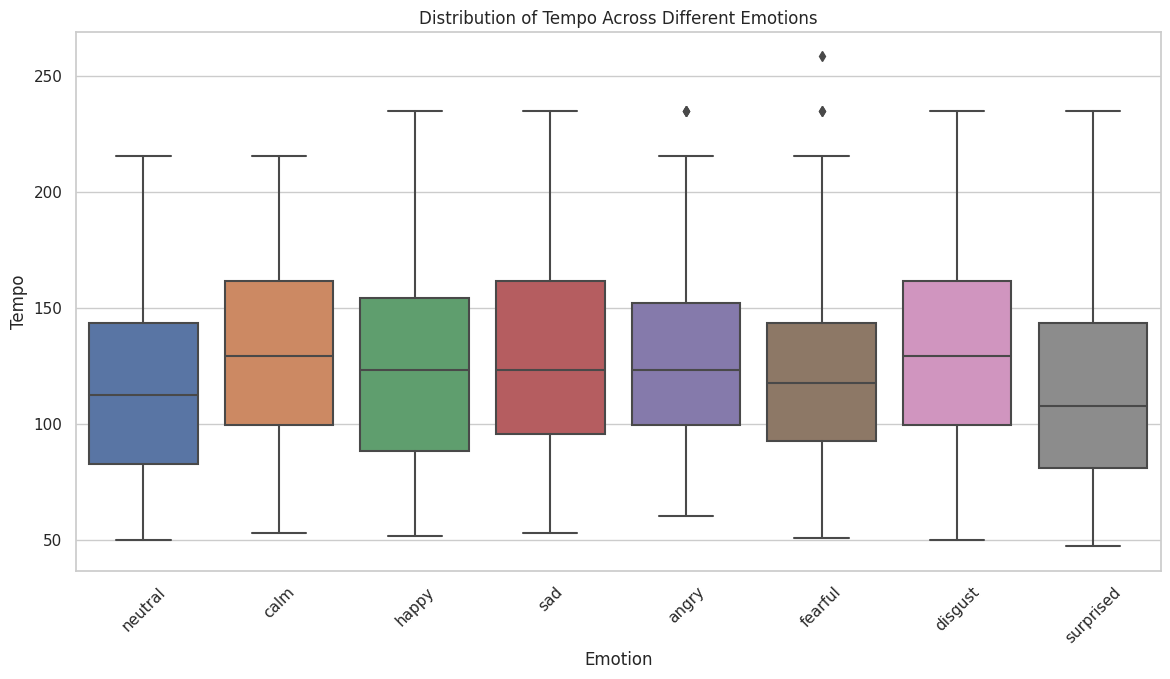

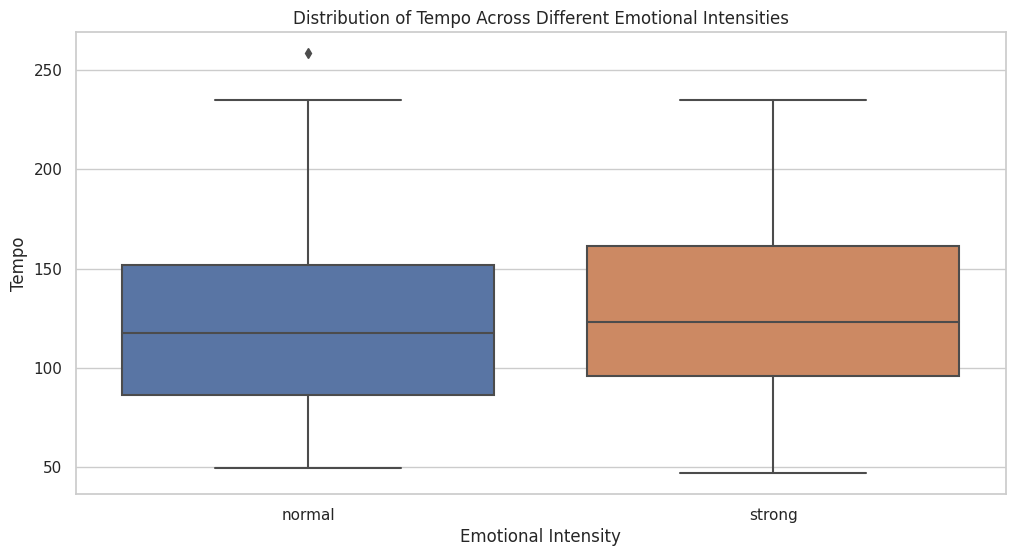

In [ ]:
# Plotting the distribution of 'tempo' across different emotions
plt.figure(figsize=(14, 7))
sns.boxplot(x='emotion', y='tempo', data=data_visuals)
plt.title('Distribution of Tempo Across Different Emotions')
plt.xlabel('Emotion')
plt.ylabel('Tempo')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of 'tempo' across different emotional intensities
plt.figure(figsize=(12, 6))
sns.boxplot(x='emotional_intensity', y='tempo', data=data_visuals)
plt.title('Distribution of Tempo Across Different Emotional Intensities')
plt.xlabel('Emotional Intensity')
plt.ylabel('Tempo')
plt.show()

In [ ]:
#Calculating the corelation between the Target Variables
Target_corelation = df['emotion'].corr(df['emotional_intensity'])

Target_corelation

0.11470786693528078

### **Observation:**

As there is little positive corelation between the target variables, we will be making two seperate models for classification of 'emotion' and 'emotional intensity'

In [4]:
df.head()

,tempo,y,sr,onset_env,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,chroma_stft,mfcc,rmse,emotion,emotional_intensity
0,80.749512,[ 5.3765323e-08 -2.1233109e-08 -6.0478840e-09 ...,22050,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[[5531.02581655 5480.22710031 5168.55894061 50...,[[3251.94200337 3213.2299866 3147.28563493 31...,[[ 9593.04199219 9528.44238281 9076.24511719...,[[0.11035156 0.22167969 0.33740234 0.46044922 ...,[[0.3932696 0.46085843 0.7762219 ... 1. ...,[[-857.35706 -857.35706 -857.35706 ... -857.35...,[[7.0248973e-07 1.0096762e-06 1.3740606e-06 1....,1,1
1,161.499023,[-2.6555713e-06 -1.2237585e-05 -9.1077754e-07 ...,22050,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[[4943.78844814 4993.14701961 5019.49951966 48...,[[3303.78084551 3274.4497113 3177.76946252 32...,[[9043.9453125 9022.41210938 8893.21289062 87...,[[0.21435547 0.35546875 0.51757812 0.48632812 ...,[[0.727733 0.6844373 0.8753823 ... 0.81595...,[[-864.93823 -864.93823 -864.93823 ... -864.93...,[[1.5071627e-06 1.9333706e-06 2.1324131e-06 4....,1,1
2,80.749512,[ 2.1218262e-05 1.6835998e-05 3.5377532e-05 ...,22050,[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.2...,[[4124.22928218 4186.23653412 3888.17059489 42...,[[3377.77702259 3428.91685101 3540.62923274 35...,[[8516.38183594 8613.28125 8559.44824219 88...,[[0.20068359 0.31152344 0.47900391 0.47314453 ...,[[0.94580525 1. 1. ... 0.76746...,[[-8.49841370e+02 -8.47600647e+02 -8.45024780e...,[[1.56080205e-05 1.95363900e-05 2.00819723e-05...,1,1
3,64.599609,[ 2.2783310e-05 3.1151623e-05 4.7930480e-06 ...,22050,[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.9...,[[3563.56852705 3751.05040943 3654.12387706 34...,[[2895.64109173 2931.95090952 2932.44273905 29...,[[7116.72363281 7461.25488281 7439.72167969 74...,[[0.36132812 0.52441406 0.68066406 0.67480469 ...,[[0.3292048 0.32930663 0.43293932 ... 0.82115...,[[-8.3864246e+02 -8.3707300e+02 -8.3462799e+02...,[[1.05454747e-05 1.41018218e-05 1.64446537e-05...,1,1
4,117.453835,[ 1.2775290e-05 5.2579344e-07 -5.9776920e-07 ...,22050,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[[4858.00856769 4406.10423614 4227.83498837 41...,[[3362.09011809 3477.10536712 3506.02519979 34...,[[8990.11230469 8839.37988281 8828.61328125 86...,[[0.34912109 0.53271484 0.72460938 0.70800781 ...,[[0.8731101 0.88231164 0.78982794 ... 0.97081...,[[-9.0457202e+02 -8.9703583e+02 -8.9400964e+02...,[[7.8230814e-06 9.3913750e-06 9.4656834e-06 9....,2,1


As seen in the above data:

Most of the data is Multidimentional Array stored in the form of a string

In [5]:
df.y[0]

'[ 5.3765323e-08 -2.1233109e-08 -6.0478840e-09 ...  1.9131086e-15\n  4.2487444e-14  5.9047873e-14]'

The above value shows that the data is truncated and can't be directly  converted into an array back from string.

Also if the data is extracted again without the truncations, it will still need aggregaion methods in order to be usable for machine learning models

Thus, we can directly extract the statistical summary rather than the whole data (mean, median, standard deviation, min, max) for all the multidimentional array features

Also, as all the features are derived using y(the encoded original audio and sampaling rate (constant for all audios), its better to drop them because they can't be used for modeling directly and to take care of the curse of colinearity)

In [9]:
df.emotion.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

As we know that the numbers represent a particular emotion and thus are categorical, so they need to be encoded using one hot encoding to remove the ordinality trait

For emotional Intensity encoding Normal as 0 from 1 and Strong 1 from 2, for standard encoding in binary classification and in case we might need the use neural nets in future

Let's move on to the Modification Phase :)